In [30]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [31]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

In [32]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

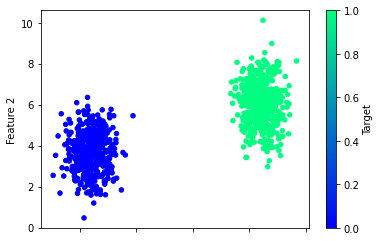

In [33]:
# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [34]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [35]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

In [36]:
# Fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [37]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [38]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [39]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [40]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [41]:
# Check the structure of the Sequential model
nn_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
750/750 [==============================] - 0s 253us/sample - loss: 0.4573 - acc: 0.9947
Epoch 2/100
750/750 [==============================] - 0s 45us/sample - loss: 0.4462 - acc: 0.9947
Epoch 3/100
750/750 [==============================] - 0s 53us/sample - loss: 0.4354 - acc: 0.9947
Epoch 4/100
750/750 [==============================] - 0s 60us/sample - loss: 0.4248 - acc: 0.9947
Epoch 5/100
750/750 [==============================] - 0s 51us/sample - loss: 0.4146 - acc: 0.9947
Epoch 6/100
750/750 [==============================] - 0s 47us/sample - loss: 0.4046 - acc: 0.9947
Epoch 7/100
750/750 [==============================] - 0s 51us/sample - loss: 0.3949 - acc: 0.9947
Epoch 8/100
750/750 [==============================] - 0s 39us/sample - loss: 0.3855 - acc: 0.9947
Epoch 9/100
750/750 [==============================] - 0s 44us/sample - loss: 0.3764 - acc: 0.9947
Epoch 10/100
750/750 [==============================] - 0s 45us/sample - loss: 0.3676 - acc: 0.9947
Epoch 11

750/750 [==============================] - 0s 45us/sample - loss: 0.0960 - acc: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 41us/sample - loss: 0.0946 - acc: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 41us/sample - loss: 0.0931 - acc: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 43us/sample - loss: 0.0918 - acc: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 43us/sample - loss: 0.0904 - acc: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 45us/sample - loss: 0.0891 - acc: 1.0000
Epoch 88/100
750/750 [==============================] - 0s 41us/sample - loss: 0.0878 - acc: 1.0000
Epoch 89/100
750/750 [==============================] - 0s 43us/sample - loss: 0.0865 - acc: 1.0000
Epoch 90/100
750/750 [==============================] - 0s 45us/sample - loss: 0.0852 - acc: 1.0000
Epoch 91/100
750/750 [==============================] - 0s 44us/sample - loss: 0.0840 - acc: 1.0000
Epoch 92/100


In [44]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

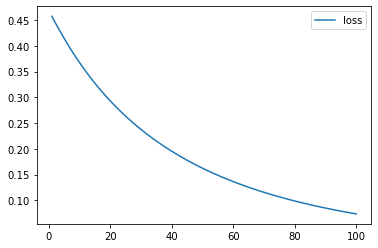

In [45]:
# Plot the loss
history_df.plot(y="loss")

In [48]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0689 - acc: 1.0000
Loss: 0.06890610790252685, Accuracy: 1.0


In [49]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

# NonLinear Model

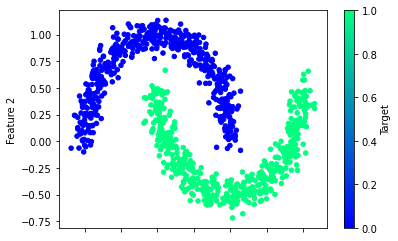

In [50]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [51]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [52]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 52us/sample - loss: 1.1987 - acc: 0.4720
Epoch 2/100
750/750 [==============================] - 0s 49us/sample - loss: 1.0472 - acc: 0.4973
Epoch 3/100
750/750 [==============================] - 0s 53us/sample - loss: 0.9469 - acc: 0.5093
Epoch 4/100
750/750 [==============================] - 0s 52us/sample - loss: 0.8842 - acc: 0.5267
Epoch 5/100
750/750 [==============================] - 0s 49us/sample - loss: 0.8370 - acc: 0.5480
Epoch 6/100
750/750 [==============================] - 0s 48us/sample - loss: 0.8023 - acc: 0.5600
Epoch 7/100
750/750 [==============================] - 0s 48us/sample - loss: 0.7743 - acc: 0.5760
Epoch 8/100
750/750 [==============================] - 0s 47us/sample - loss: 0.7508 - acc: 0.5827
Epoch 9/100
750/750 [==============================] - 0s 52us/sample - loss: 0.7316 - acc: 0.5933
Epoch 10/100
750/750 [==============================] - 0s 47us/sample - loss: 0.7146 - acc: 0.6040
Epoch 11/

750/750 [==============================] - 0s 49us/sample - loss: 0.3239 - acc: 0.8507
Epoch 84/100
750/750 [==============================] - 0s 49us/sample - loss: 0.3210 - acc: 0.8520
Epoch 85/100
750/750 [==============================] - 0s 48us/sample - loss: 0.3181 - acc: 0.8560
Epoch 86/100
750/750 [==============================] - 0s 48us/sample - loss: 0.3155 - acc: 0.8587
Epoch 87/100
750/750 [==============================] - 0s 47us/sample - loss: 0.3131 - acc: 0.8627
Epoch 88/100
750/750 [==============================] - 0s 51us/sample - loss: 0.3108 - acc: 0.8653
Epoch 89/100
750/750 [==============================] - 0s 49us/sample - loss: 0.3086 - acc: 0.8667
Epoch 90/100
750/750 [==============================] - 0s 48us/sample - loss: 0.3066 - acc: 0.8680
Epoch 91/100
750/750 [==============================] - 0s 49us/sample - loss: 0.3047 - acc: 0.8680
Epoch 92/100
750/750 [==============================] - 0s 55us/sample - loss: 0.3030 - acc: 0.8693
Epoch 93/100


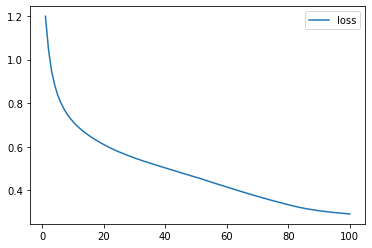

In [53]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

# ADD more hidden layers

In [55]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [56]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [57]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 383us/sample - loss: 0.5552 - acc: 0.8667
Epoch 2/100
750/750 [==============================] - 0s 69us/sample - loss: 0.5311 - acc: 0.8693
Epoch 3/100
750/750 [==============================] - 0s 61us/sample - loss: 0.5088 - acc: 0.8707
Epoch 4/100
750/750 [==============================] - 0s 64us/sample - loss: 0.4870 - acc: 0.8693
Epoch 5/100
750/750 [==============================] - 0s 87us/sample - loss: 0.4664 - acc: 0.8680
Epoch 6/100
750/750 [==============================] - 0s 77us/sample - loss: 0.4468 - acc: 0.8680
Epoch 7/100
750/750 [==============================] - 0s 96us/sample - loss: 0.4281 - acc: 0.8680
Epoch 8/100
750/750 [==============================] - 0s 65us/sample - loss: 0.4102 - acc: 0.8680
Epoch 9/100
750/750 [==============================] - 0s 75us/sample - loss: 0.3939 - acc: 0.8680
Epoch 10/100
750/750 [==============================] - 0s 63us/sample - loss: 0.3789 - acc: 0.8680
Epoch 11

750/750 [==============================] - 0s 68us/sample - loss: 0.2124 - acc: 0.9000
Epoch 83/100
750/750 [==============================] - 0s 59us/sample - loss: 0.2117 - acc: 0.8987
Epoch 84/100
750/750 [==============================] - 0s 53us/sample - loss: 0.2110 - acc: 0.9000
Epoch 85/100
750/750 [==============================] - 0s 49us/sample - loss: 0.2103 - acc: 0.9000
Epoch 86/100
750/750 [==============================] - 0s 51us/sample - loss: 0.2097 - acc: 0.8987
Epoch 87/100
750/750 [==============================] - 0s 55us/sample - loss: 0.2091 - acc: 0.9013
Epoch 88/100
750/750 [==============================] - 0s 56us/sample - loss: 0.2084 - acc: 0.9000
Epoch 89/100
750/750 [==============================] - 0s 48us/sample - loss: 0.2079 - acc: 0.8987
Epoch 90/100
750/750 [==============================] - 0s 53us/sample - loss: 0.2072 - acc: 0.9013
Epoch 91/100
750/750 [==============================] - 0s 60us/sample - loss: 0.2068 - acc: 0.9013
Epoch 92/100
